In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reference: https://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data
comments = pd.read_csv(r"C:\\Users\\ronal\\OneDrive\\Desktop\\Analytics vidhya\\Untitled Folder\\Youtube analysis\\GBcomments.csv",error_bad_lines = False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [3]:
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  
0        0  
1        0  
2        0  
3        0  
4        0

### Sentiment Analysis

In [4]:
from textblob import TextBlob

In [5]:
TextBlob('Its more accurate to call it the M+ (1000) be...').sentiment.polarity

0.45000000000000007

In [6]:
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [7]:
comments.dropna(inplace = True)

In [8]:
polarity = []
for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [9]:
comments['Polarity'] = polarity

In [10]:
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  Polarity  
0        0      0.45  
1        0      0.00  
2        0      0.00  
3        0      0.00  
4        0      1.00

### EDA for positive Sentiment

In [11]:
comments_positive = comments[comments['Polarity'] == 1]

In [12]:
comments_positive.shape

(20400, 5)

In [13]:
comments_positive.head()

video_id                                       comment_text  likes  \
4    jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
26   jt2OHQh0HoQ            The best thing to ever happen to iPhone      0   
80   jt2OHQh0HoQ  Apple is always awesome \n\nhttps://youtu.be/r...      0   
158  YPVcg45W0z4  das a lot of edditing you have done there ... ...      0   
175  YPVcg45W0z4                        Welcome to the Scandiworld!      0   

     replies  Polarity  
4          0       1.0  
26         2       1.0  
80         1       1.0  
158        0       1.0  
175        0       1.0

In [14]:
from wordcloud import WordCloud, STOPWORDS

In [15]:
stopwords = set(STOPWORDS)

In [16]:
total_comments = ' '.join(comments_positive['comment_text'])

In [17]:
wordcloud = WordCloud(width=1000,height = 500,stopwords = stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

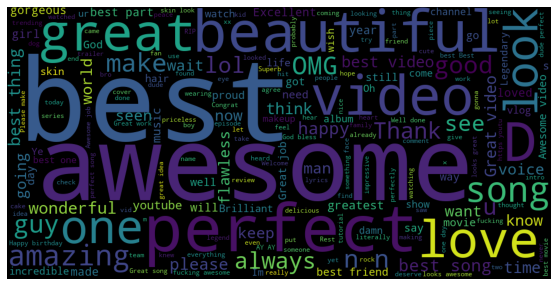

In [18]:
plt.figure(figsize = (15,5))
plt.imshow(wordcloud)
plt.axis('off')

### EDA for Negative Sentiment

In [19]:
comments_negative = comments[comments['Polarity'] == -1]

In [20]:
total_comments = ' '.join(comments_negative['comment_text'])

In [21]:
wordcloud = WordCloud(width=1000,height = 500,stopwords = stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

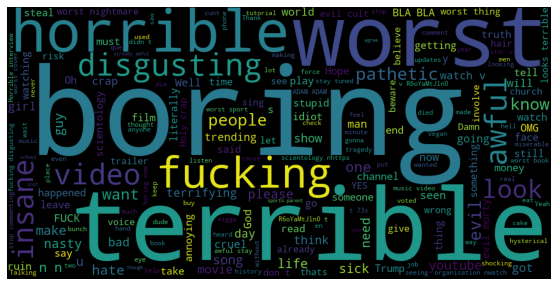

In [22]:
plt.figure(figsize = (15,5))
plt.imshow(wordcloud)
plt.axis('off')

### Analyzing Tags column, What are trending tags on youtube?

In [23]:
videos = pd.read_csv(r"C:\\Users\\ronal\\OneDrive\\Desktop\\Analytics vidhya\\Untitled Folder\\Youtube analysis\\USvideos.csv",error_bad_lines = False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [24]:
videos.head()

video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [25]:
tags_complete = ' '.join(videos['tags'])

In [26]:
tags_complete

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 

In [27]:
import re

In [28]:
tags = re.sub('[^a-zA-Z]',' ',tags_complete)

In [29]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone  none  apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

In [31]:
tags = re.sub(' +'," ",tags)

In [34]:
wordcloud = WordCloud(width = 1000, height = 500,stopwords = set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

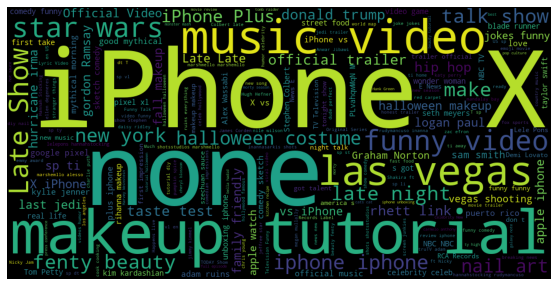

In [37]:
plt.figure(figsize = (15,5))
plt.imshow(wordcloud)
plt.axis('off')

### Perform Analysis on likes, views and Dislikes and find howt they are co-related with each other?

Text(0.5, 1.0, 'Regression plot for views and likes')

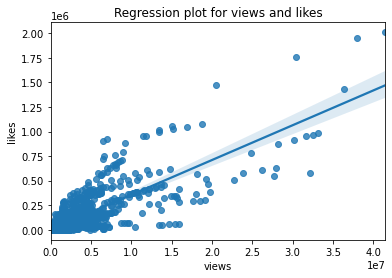

In [39]:
sns.regplot(data = videos,x = 'views',y = 'likes')
plt.title('Regression plot for views and likes')

Text(0.5, 1.0, 'Regression plot for views and dislikes')

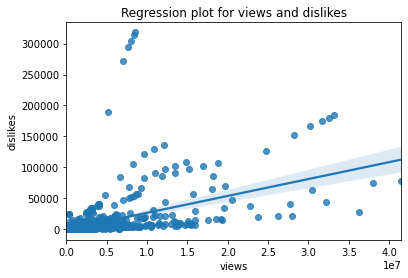

In [40]:
sns.regplot(data = videos,x = 'views',y = 'dislikes')
plt.title('Regression plot for views and dislikes')

In [41]:
df_corr = videos[['views','likes','dislikes']]

In [42]:
df_corr.corr()

views     likes  dislikes
views     1.000000  0.832844  0.541955
likes     0.832844  1.000000  0.497439
dislikes  0.541955  0.497439  1.000000

<AxesSubplot:>

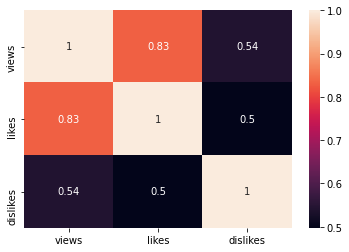

In [44]:
sns.heatmap(df_corr.corr(),annot=True)